# Generic Gradient Boosting

<center><img alt='image' src="https://scontent.fala7-1.fna.fbcdn.net/v/t1.6435-9/118506152_1607334476094157_6615778960977758282_n.png?_nc_cat=104&ccb=1-7&_nc_sid=7f8c78&_nc_ohc=kabsV5q41LkAX_onlTi&_nc_ht=scontent.fala7-1.fna&oh=00_AfAJS9tLB-5eXK6wo5pV8HWvHc2cg6WfiyCD6hwJoLDzkg&oe=65A2E76F"/></center>


Gradient boosting is a technigue where a model is constructed as a summation of weak models, where every consecutive model is "learning" from previous model towards the optimal model. A gradient in this case is taken from the chosen loss function. Gradient Boosting is an ensemble learning technique that builds a strong predictive model by combining the predictions of multiple weak models, typically decision trees.

Gradient boosting is efficient for dealing with tabular datasets. The initial step of gradient boosting is to choose a loss function, as the addition of models is performed using gradient descent.

## General form of gradient boosting

 A set of pairs of features $x$ and target variables $y$, $\left\{(x_i, y_i)\right\}_{i=1, \ldots,n}$, on which we will restore the dependence of the form $y = f(x)$. We will restore using the approximation $\hat{f}(x)$, and to understand which approximation is better, we will also have a loss function $ L(y,f)$, which we will minimize:

$$
y ≈ \hat{f}(x)
$$
$$
\hat{f}(x) = argmin _{f(x)} L(y,f(x))
$$

Currently, no assumptions are made regarding the nature of the dependency $\large f(x)$, the model of our approximations $\large\hat{f}(x)$, or the distribution of the target variable $\large y$, except for the differentiability requirement of the function $\large L(y,f)$.

To focus on available data rather than the entire dataset, we express everything in terms of expectations.

Specifically, we seek approximations $\large\hat{f}(x)$ that, on average, minimize the loss function across the available data.

In addressing the vast array of $\large f(x)$ functions worldwide, machine learning simplifies the task by limiting the search space to a parameterized family of functions $\large f(x,\theta), \theta\in\mathbb{R}^d$, facilitating the optimization of parameter values.

$$
\hat{f}(x) = f(x, \hat{θ}),
$$
$$
\hat{θ} = argmin _θ  𝔼_{x,y} [L(y,f(x,\theta))]
$$

Optimal parameters $\large \hat{\theta}$ are typically iteratively approximated due to the rarity of analytical solutions, involving the expression of the empirical loss function $\large L_{\theta}(\hat{\theta})$ for data evaluation and a summative representation of the iterative approximation over $\large M$ iterations.

$$
 \hat{θ} = \sum \limits _{i=1} ^{M} \hat{θ} _i,
$$
$$
L _θ (\hat{θ}) = \sum \limits _{i=1} ^N L(y _i, f(x _i, \hat{\theta}))
$$

The final step involves employing an iterative algorithm, typically gradient descent, to minimize $\large L_{\theta}(\hat{\theta})$ by updating our estimates $\large\hat{\theta_i}$ along the negative gradient $\large \nabla L_{\theta}(\hat{\theta})$; initializing the first approximation $\large\hat{\theta_0}$ and determining the number of iterations $\large M$ concludes the procedure in our memory-inefficient form of storing approximations.

1. Initialize the initial approximation of the parameters $\large \hat{\theta} = \hat{\theta_0}$
2. For each iteration $t = 1,...., M$:
  1. Calculate loss function $\large \nabla L_{\theta}(\hat{\theta})$ with current approximation $\large \hat{\theta}$
$$\large \nabla L_{\theta}(\hat{\theta}) = \left[\frac{\partial L(y, f(x, \theta))}{\partial \theta}\right]_{\theta = \hat{\theta}}$$
  2. Set the current iterative approximation of $\large\hat{\theta_t}$ based on the calculated gradient
$$\large \hat{\theta_t} \leftarrow −\nabla L_{\theta}(\hat{\theta})$$
  3. Update $\large \hat{\theta}$:
$$\large \hat{\theta} \leftarrow \hat{\theta} + \hat{\theta_t} = \sum_{i = 0}^t \hat{\theta_i} $$
3. Save current $\large \hat{\theta}$
$$\large \hat{\theta} = \sum_{i = 0}^M \hat{\theta_i} $$
4. Use the result $\large \hat{f}(x) = f(x, \hat{\theta})$

To enter the algorithm, you need to collect several components:


* dataset $\large \left\{(x_i, y_i) \right\}_{i=1, \ldots,n}$;
* the number of iterations of $\large M$;
* selection of the loss function $\large L(y,f)$ with a prescribed gradient;
* selection of a family of functions of the basic algorithms $\large h(x,\theta)$, with the procedure for their training;
* additional hyperparameters $\large h(x,\theta)$, for example, the tree depth of decision trees;

The overlooked aspect is the initialization of $\large f_0(x)$; for simplicity, a constant value $\large\gamma$ suffices, and both it and the optimal coefficient $\large\rho$ are determined through binary search or another line search algorithm with respect to the original loss function in the context of the GBM algorithm.

Initialize boosting with the constant value $\hat{f}(x) = \hat{f}_0, \hat{f}_0 = \gamma, \gamma \in \mathbb{R}$
$$\hat{f}_0 = \underset{\gamma}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \gamma)$$
Repeat for each iteration $t = 1, \dots, M$:
  1. Calculate the pseudo-residuals $r _t$

$$
r_{it} = -[\frac{\partial L(y_i, f(x_i))}{\partial f(x_i)}] _{f(x)=\hat{f}(x)}, \mbox{for } i=1,\ldots,n
$$
  2. Construct a new basic algorithm $h_t(x)$ as a regression on pseudo-residuals
$$
\{ (x_i, r_{it})\}_{i=1, \ldots,n}
$$

  3. Find the optimal coefficient $\rho_t$ for $h_t(x)$ relative to the original loss function
$$
\rho_t = \underset{\rho}{\arg\min} \ \sum_{i = 1}^{n} L(y_i, \hat{f}(x_i) + \rho \cdot h(x_i, \theta))
$$
  4. Save $\hat{f_t}(x) = \rho_t \cdot h_t(x)$
  5. Update the current approximation $\hat{f}(x)$
$$
\hat{f}(x) \leftarrow \hat{f}(x) + \hat{f_t}(x) = \sum_{i = 0}^{t} \hat{f_i}(x)
$$
To compose the final GBM model $ \hat{f}(x)$
$$
 \hat{f}(x) = \sum_{i = 0}^M \hat{f_i}(x)
$$

<span style="display:none" id="q_general">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBhIHdlYWsgbGVhcm5lciBpbiB0aGUgY29udGV4dCBvZiBHcmFkaWVudCBCb29zdGluZz8iLCAidHlwZSI6ICJtdWx0aXBsZV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImNvZGUiOiAiPGg2Pk1vZGVsIHRoYXQgcGVyZm9ybXMgcG9vcmx5IG9uIHRoZSB0cmFpbmluZyBkYXRhPC9oNj4iLCAiY29ycmVjdCI6IGZhbHNlfSwgeyJjb2RlIjogIjxoNj5Nb2RlbCB3aXRoIGhpZ2ggYmlhcyBhbmQgbG93IHZhcmlhbmNlPC9oNj4iLCAiY29ycmVjdCI6IGZhbHNlfSwgeyJjb2RlIjogIjxoNj5Nb2RlbCB0aGF0IHBlcmZvcm1zIHNsaWdodGx5IGJldHRlciB0aGFuIHJhbmRvbSBndWVzc2luZzwvaDY+IiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIjxoNj5Nb2RlbCB3aXRoIGhpZ2ggdmFyaWFuY2UgYW5kIGxvdyBiaWFzPC9oNj4iLCAiY29ycmVjdCI6IGZhbHNlfV19XQ==</span>

In [12]:
from jupyterquiz import display_quiz
display_quiz("#q_general")

<IPython.core.display.Javascript object>

## Loss Function

### Loss function regression

* $ L(y, f) = (y - f)^2$, or $ L_2$ loss, aka Gaussian loss. This is a classic conditional average, the most common and simplest option. If there is no additional information or requirements for the stability (robustness) of the model, use it.

* $L(y, f) = |y - f|$, aka $ L_1$ loss, aka Laplacian loss.

* $\begin{equation} L(y, f) =\left\{ \begin{array}{@{}ll@{}} (1 - \alpha) \cdot |y - f|, & \text{if}\ y-f \leq 0 \\ \alpha \cdot |y - f|, & \text{if}\ y-f >0 \end{array}\right. \end{equation}, \alpha \in (0,1) $, or $L_q$ loss,  Quantile loss.

### Loss function Classification

* $L(y, f) = log(1 + exp(-2yf))$, aka Logistic loss, aka Bernoulli loss. An interesting property is that we penalize even correctly predicted class labels.

* $L(y, f) = exp(-yf)$, aka Adaboost loss. It so happens that the classic Adaboost algorithm is equivalent to GBM with this loss function. Conceptually, this loss function is very similar to Logistic loss, but has a tougher exponential penalty for classification errors and is used less frequently.

## Stochastic gradient boosting

Stochastic Gradient Boosting is a variant of the traditional Gradient Boosting algorithm that introduces the concept of stochasticity to the model-building process. In standard Gradient Boosting, each weak learner is trained on the entire training dataset. In contrast, stochastic gradient boosting involves training each weak learner on a random subset of the training data. This introduces randomness into the model, which can improve generalization and reduce overfitting.

1.   **Subsample of Data (Stochasticity)**: Instead of using the entire training dataset to train each weak learner, a random subset (subsample) of the data is used. This subset is typically chosen without replacement.
2.   **Random Feature Subset (Optional)**: In addition to subsampling data, some implementations of stochastic gradient boosting also randomly select a subset of features for each weak learner. This introduces additional randomness to the model.
3.   **Combining Predictions**: The predictions of each weak learner are combined, similar to traditional gradient boosting, but with the added stochasticity. The final prediction is an aggregation of the predictions from all the weak learners.





### Stochastic Gradient Boosting Extension:

Randomly select a subset of samples $S _m$ of size subsample_ratio $ × N$

* Update the negative gradient calculation for $i ∈ S _m$

Randomly select a subset of features  $F _m$ of size feature_subsample_ratio $ ×D$

* Update the weak model fitting to consider only features in $F _m$

Adjust the contribution of each weak model:

$$
F(x) = F _0(x) + \sum \limits _{m=1} ^M p _m h _m(x)
$$

<span style="display:none" id="q_learn_rate">W3sicXVlc3Rpb24iOiAiQ29uc2lkZXIgdGhlIHNjZW5hcmlvIHdoZXJlIHRoZSBsZWFybmluZyByYXRlICgkXFxldGEkKSBpcyBleHRyZW1lbHkgbGFyZ2UgaW4gR3JhZGllbnQgQm9vc3RpbmcuIFdoYXQgZWZmZWN0IGRvZXMgdGhpcyBoYXZlIG9uIHRoZSBjb252ZXJnZW5jZSBvZiB0aGUgYWxnb3JpdGhtPyIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siY29kZSI6ICJUaGUgYWxnb3JpdGhtIGNvbnZlcmdlcyBmYXN0ZXIuIiwgImNvcnJlY3QiOiBmYWxzZX0sIHsiY29kZSI6ICJUaGUgYWxnb3JpdGhtIG1heSBmYWlsIHRvIGNvbnZlcmdlIG9yIGRpdmVyZ2UuIiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIlRoZSB1cGRhdGVzIHRvIHRoZSBwcmVkaWN0ZWQgdmFsdWVzIGJlY29tZSBuZWdsaWdpYmxlLiIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiVGhlIGFsZ29yaXRobSBiZWNvbWVzIGxlc3MgcHJvbmUgdG8gb3ZlcmZpdHRpbmcuIiwgImNvcnJlY3QiOiBmYWxzZX1dfV0=</span>

In [8]:
display_quiz("#q_learn_rate")

<IPython.core.display.Javascript object>

Fit a weak model $h _m(x)$ to predict the negative gradient of the loss function, where $p _m$ is learning rate

* **subsample_ratio**: Fraction of the dataset to be used for fitting each weak model.
* **feature_subsample_ratio**: Fraction of features to be considered for each weak model.
* **learning_rate**: Controls the contribution of each weak model to the ensemble.

The final prediction is the sum of predictions from all weak models, each scaled by the learning rate:

$$
\hat{y}(x) = F _0(x) + \sum \limits _{m=1} ^M p _m h _m(x)
$$

In training process, it fits weak models sequentially, with each one addressing the residuals of the combined ensemble.

<span style="display:none" id="q_res_impact">W3sicXVlc3Rpb24iOiAiQ29uc2lkZXIgdGhlIHNjZW5hcmlvIHdoZXJlIHRoZSB0cnVlIGxhYmVscyAoJHlfaSQpIGFyZSBhbGwgdGhlIHNhbWUuIFdoYXQgaW1wYWN0IGRvZXMgdGhpcyBoYXZlIG9uIHRoZSByZXNpZHVhbCAkcl90KGkpJD8iLCAidHlwZSI6ICJtdWx0aXBsZV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImNvZGUiOiAiPGg0PiRyX3QoaSkkIGlzIGFsd2F5cyB6ZXJvLjwvaDQ+IiwgImNvcnJlY3QiOiBmYWxzZX0sIHsiY29kZSI6ICI8aDQ+JHJfdChpKSQgaXMgY29uc3RhbnQgYnV0IG5vdCBuZWNlc3NhcmlseSB6ZXJvLjwvaDQ+IiwgImNvcnJlY3QiOiB0cnVlfSwgeyJjb2RlIjogIjxoND4kcl90KGkpJCBiZWNvbWVzIHVuZGVmaW5lZC48L2g0PiIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiPGg0PiRyX3QoaSkkIG9zY2lsbGF0ZXMgYmV0d2VlbiBwb3NpdGl2ZSBhbmQgbmVnYXRpdmUgdmFsdWVzLjwvaDQ+IiwgImNvcnJlY3QiOiBmYWxzZX1dfV0=</span>

In [15]:
display_quiz("#q_res_impact")

<IPython.core.display.Javascript object>

The benefits of stochastic gradient boosting include:

*   **Reduced Overfitting**: By training on random subsets of data, the model is less likely to memorize noise in the training set, resulting in better generalization to unseen data.

*   **Faster Training**: Training on smaller subsets can lead to faster training times, especially when the dataset is large.

*   **Improved Robustness**: Stochasticity introduces robustness to the model, making it less sensitive to outliers and noise.



Popular implementations of Stochastic Gradient Boosting include XGBoost and LightGBM, both of which offer options for subsampling data and features.

## Gradient tree boosting

Gradient Tree Boosting, often referred to as Gradient Boosted Trees or simply Gradient Boosting, is an ensemble learning technique that combines the predictions of multiple decision trees to create a powerful predictive model. It builds trees sequentially, with each tree correcting the errors of the combined predictions of the previous trees. The general concept is based on the minimization of a loss function.

<center><img alt='image' src="https://i0.wp.com/sefiks.com/wp-content/uploads/2018/10/golf-dir-vector.png?resize=720%2C346&ssl=1"/></center>

Components and steps of Gradient Tree Boosting:

1. **Initialize Model**:
    *   Start with a simple model, typically the mean of the target variable for regression problems or a log-odds transformation for classification problems.
2. **Compute Pseudo-Residuals**:

    *   Compute the negative gradient of the loss function with respect to the current model's predictions. These negative gradients are treated as pseudo-residuals, representing the errors that need to be corrected by the next tree.
3. **Build a Decision Tree**:

    *   Fit a decision tree to the pseudo-residuals. The tree is typically shallow, with a limited number of nodes (e.g., a stump or small tree) to prevent overfitting.
4. **Compute Tree Contribution**:

    *   The output of the tree is multiplied by a shrinkage parameter (learning rate) before being added to the current model. This helps control the contribution of each tree to the final model and improves generalization.
5. **Update Model**:

    *   Update the current model by adding the contribution of the newly built tree.
6. **Iterate**:

    *   Repeat steps 2-5 until a predefined number of trees are built or until a convergence criterion is met.

The hyperparameters of Gradient Tree Boosting include the learning rate, the number of trees (iterations), the depth of each tree, and other tree-related parameters. The learning rate controls the contribution of each tree, and smaller values often lead to better generalization.

Gradient Tree Boosting has proven to be highly effective for a wide range of tasks, including regression, classification, and ranking. It is known for its ability to handle complex relationships in data and its resistance to overfitting.

<span style="display:none" id="q_grad_zero">W3sicXVlc3Rpb24iOiAiV2hhdCBoYXBwZW5zIGlmIHRoZSByZXNpZHVhbCAkcl90KGkpJCBpcyBjb25zaXN0ZW50bHkgemVybyBmb3IgYWxsIHRyYWluaW5nIGV4YW1wbGVzPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJjb2RlIjogIjxoND5XZWFrIGxlYXJuZXJzIGJlY29tZSBsZXNzIGluZmx1ZW50aWFsPC9oND4iLCAiY29ycmVjdCI6IHRydWV9LCB7ImNvZGUiOiAiPGg0PlRoZSBsZWFybmluZyByYXRlIFx1MDNiNyBiZWNvbWVzIGlycmVsZXZhbnQ8L2g0PiIsICJjb3JyZWN0IjogdHJ1ZX0sIHsiY29kZSI6ICI8aDQ+VGhlIGFsZ29yaXRobSBiZWNvbWVzIG1vcmUgcHJvbmUgdG8gb3ZlcmZpdHRpbmc8L2g0PiIsICJjb3JyZWN0IjogZmFsc2V9LCB7ImNvZGUiOiAiPGg0PlRoZSBhbGdvcml0aG0gY29udmVyZ2VzIGZhc3RlcjwvaDQ+IiwgImNvcnJlY3QiOiBmYWxzZX1dfV0=</span>

In [20]:
display_quiz("#q_grad_zero",)

<IPython.core.display.Javascript object>

<span style="display:none" id="q_exercise">W3sicXVlc3Rpb24iOiAiQ29uc2lkZXIgYSBkYXRhc2V0IHdpdGggdGhyZWUgaW5kZXBlbmRlbnQgdmFyaWFibGVzICgkWF8xJCwgJFhfMiQsICRYXzMkKSBhbmQgdGhlIGRlcGVuZGVudCB2YXJpYWJsZSAkWSQgKEhvdXNlVmFsdWUpLiBTdG9jaGFzdGljIEdyYWRpZW50IEJvb3N0aW5nIGlzIHVzZWQgdG8gcHJlZGljdCBIb3VzZVZhbHVlIHdpdGggYSBsZWFybmluZyByYXRlICgkXFxyaG8kKSBvZiAwLjEuIFRoZSBpbml0aWFsIG1vZGVsIHByZWRpY3Rpb24gaXMgJEZfMCh4KSA9IDUwJC4gQWZ0ZXIgdGhlIGZpcnN0IGl0ZXJhdGlvbiwgdGhlIHdlYWsgbW9kZWwgcHJlZGljdGlvbiBpcyAkaF8xKHgpID0gMTAkLiBJZiB0aGUgbmVnYXRpdmUgZ3JhZGllbnQgZm9yIHRoZSBpLXRoIGRhdGEgcG9pbnQgKCRyX3tpMX0kKSBpcyBjYWxjdWxhdGVkIGFzICRyX3tpMX0gPSA1JCwgZGV0ZXJtaW5lIHRoZSB1cGRhdGVkIHByZWRpY3Rpb24gJEZfMSh4KSQgYWZ0ZXIgdGhlIGZpcnN0IGl0ZXJhdGlvbi4iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogNTEsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZSB1cGRhdGVkIHByZWRpY3Rpb24gYWZ0ZXIgdGhlIGZpcnN0IGl0ZXJhdGlvbiBpcyAkRl8xKHgpID0gNTEkLiJ9LCB7InR5cGUiOiAiZGVmYXVsdCIsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuVGhlIHVwZGF0ZSBmb3JtdWxhIGZvciB0aGUgbW9kZWwgYWZ0ZXIgdGhlIGZpcnN0IGl0ZXJhdGlvbiBpcyBnaXZlbiBieTokRl8xKHgpJD0kRl8wKHgpJCtcdTAzYzFcdTIyYzUkaF8xKHgpJCJ9XX1d</span>

In [23]:
display_quiz("#q_exercise",)

<IPython.core.display.Javascript object>

## California housing dataset

California housing dataset that was sourced. This dataset was derived from the 1990 U.S. census, using one row per census
block group. It has many characteristics of learning.
Dataset taken from sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']
import pandas as pd
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
                  4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'HouseValue'}, inplace=True)
df = pd.concat([df1, df2], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

 A scatter plot with latitude and longitude to visualize the data:

<Axes: xlabel='Longitude', ylabel='Latitude'>

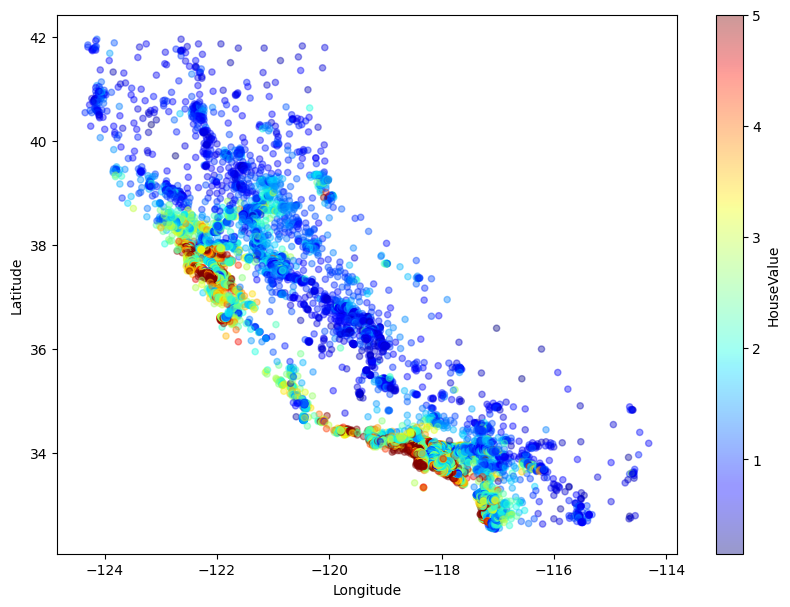

In [ ]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, figsize=(10,7),
 c='HouseValue', cmap=plt.get_cmap('jet'), colorbar=True,
 sharex=False)

We aim to predict the variable "HouseValue." Let's examine the correlation between each independent variable and this dependent variable.

In [ ]:
corr_matrix = df.corr()
corr_matrix['HouseValue'].sort_values(ascending=False)

HouseValue    1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: HouseValue, dtype: float64

We are now going to visualize the correlation between variables by using Pandas’ `scatter_matrix` function.

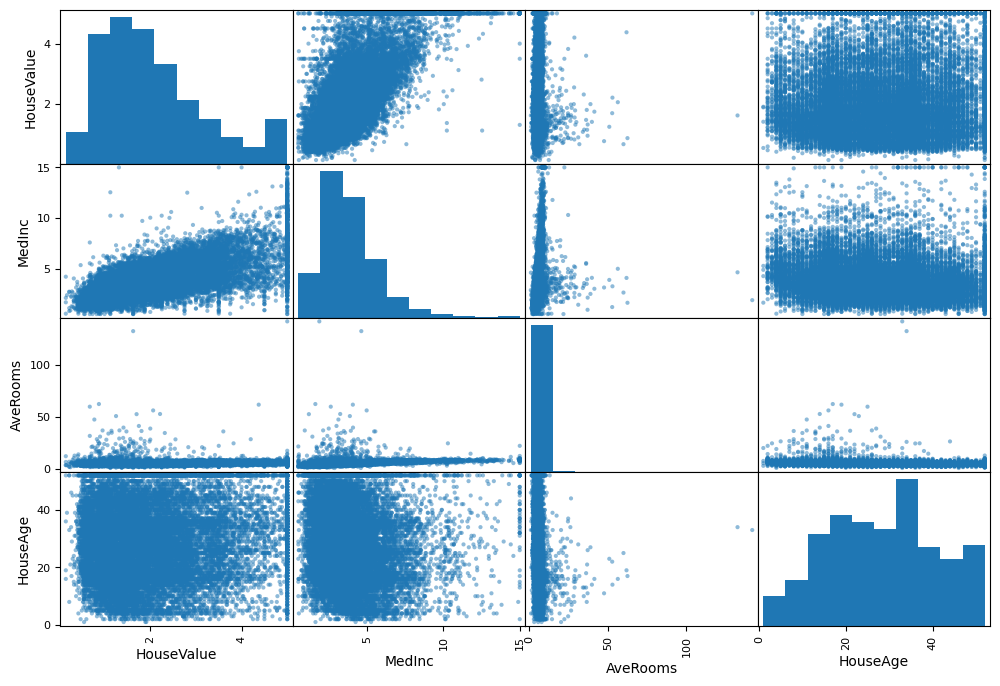

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['HouseValue', 'MedInc', 'AveRooms', 'HouseAge']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

The most promising variable for predicting the HouseValue is the MedInc

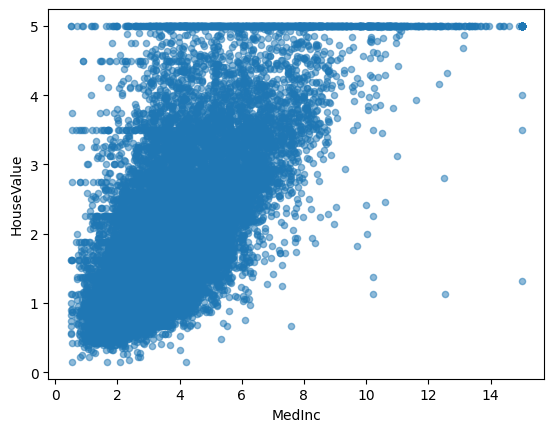

In [ ]:
df.plot(kind='scatter', x='MedInc', y='HouseValue', alpha=0.5)
plt.savefig('scatter.png')

In [ ]:
inco = df.groupby('Population').mean()['MedInc']
mean = df.groupby('Population').mean()['HouseValue']
cluster = pd.concat([inco, mean], axis=1)
cluster.columns = ['inco', 'HouseValue']


cluster1 = cluster[cluster.HouseValue < 1.975]
cluster_temp = cluster[cluster.HouseValue >= 1.975]
cluster2 = cluster_temp[cluster_temp.inco < 3.728921]
cluster3 = cluster_temp[cluster_temp.inco >= 3.728921]

def get_group(x):
 if x in cluster1.index:
     return 'low_value'
 elif x in cluster2.index:
     return 'high_value_low_income'
 else:
     return 'high_value_high_income'
df['group'] = df.Population.apply(get_group)

df.drop(['Latitude', 'Longitude', 'Population'], axis=1, inplace=True)
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'group', 'HouseValue']]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,group,HouseValue
0,8.3252,41.0,6.984127,1.023810,2.555556,high_value_high_income,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,high_value_high_income,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,low_value,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,high_value_low_income,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,high_value_high_income,3.422


After performing the above pre-processing, we do not need the following columns anymore: “Latitude, Longitude, Population”, so, we drop them from our analysis.

We need to create dummy variables for the categorical variable: “group”.

In [ ]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup','group']]
Y = df['HouseValue']
n = pd.get_dummies(df.group)
X = pd.concat([X, n], axis=1)
drops = ['group']
X.drop(drops, inplace=True, axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,high_value_high_income,high_value_low_income,low_value
0,8.3252,41.0,6.984127,1.023810,2.555556,1,0,0
1,8.3014,21.0,6.238137,0.971880,2.109842,1,0,0
2,7.2574,52.0,8.288136,1.073446,2.802260,0,0,1
3,5.6431,52.0,5.817352,1.073059,2.547945,0,1,0
4,3.8462,52.0,6.281853,1.081081,2.181467,1,0,0


Calculate R squared:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared: 0.5546


Calculate root-mean-square error (RMSE)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 0.7704


Calculate mean absolute error (MAE):

In [ ]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 0.5645


Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print('Random Forest R squared: %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared: 0.6781


In [ ]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 0.6550


Implementing gradient boosting

In [ ]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

print('Gradient Boosting R squared: %.4f' % model.score(X_test, y_test))

y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting R squared: 0.6850
Gradient Boosting RMSE: 0.6479
